<a href="https://colab.research.google.com/github/Siddharthgolecha/QHack-2023-Qshrodinger010/blob/main/QHack_2023_ARKS_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
!pip install qiskit
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
import numpy as np
import qiskit
import matplotlib.pyplot as plt
from qiskit import Aer, QuantumCircuit
import graphviz

# ARKS Representation

For a given statevector $|\psi\rangle$, the graph is constructed with the following rules - 
1. In the case of a single qudit state, the states are written in a column, with the corresponding probability amplitude below each state.
2. $d*number\_of\_qudits$ nodes are created, with each $Z$-basis state written in the same row.
3. Each qudit is in a column.
4. Weighted edges between states represent a state, with the weights given by the probability amplitude.

In [106]:
def arks_representation(statevector: list, d:int = 2)->None:
  statevector = np.array(statevector)
  if np.sum(statevector**2) != 1:
    raise Exception("The statevector's probability does not add upto 1")

  num_qudits = int(np.log(len(statevector))/np.log(d))
  if d**num_qudits != len(statevector):
    raise Exception(f"The statevector's length does not look like a statevector for {d} states")

  graph = graphviz.Graph('arks_repr', format='svg')
  graph.graph_attr.update(splines="false", rankdir='LR', ordering="out")
  graph.node_attr.update(label="")

  for k in range(num_qudits):
    with graph.subgraph(name=f"clusterQ{k}") as qudit: # Creating clusters for a qudit
      qudit.attr(rank="same")
      qudit.attr(label=f"Q{k}")
      qudit.attr(group="Q")
      qudit.node_attr.update(shape="circle", style="filled", color="#ADD8E6")
      for i in range(d): # Adding qudit states of a qudit
        label = f"\|{i}⟩" 
        label += "" if num_qudits > 1 else f"\n{np.round(statevector[i],3)}"
        qudit.node(f"q{k}_{i}", label=label)

  if num_qudits > 1:

    # Adding edges between qudits
    for state, amp in enumerate(statevector):
      if amp != 0:
        state = list(np.base_repr(state, base=d).zfill(num_qudits))
        color = "#"+''.join(np.random.choice(list('0123456789ABCDEF'), 6)) #Randomly choosing a color

        # Connecting the states of the qudits to represent the statevector
        for idx in range(len(state)-1):
          graph.edge(f"q{idx}_{state[idx]}", 
                    f"q{idx+1}_{state[idx+1]}", 
                    color=color,
                    label=f"<<font color=\"{color}\">{np.round(amp,3)}</font>>",
                    fontsize="9")


  return graph

## Examples

### One Qubit ARKS Representation

In [116]:
circuit_qubit1 = QuantumCircuit(1)
circuit_qubit1.h(0)
backend = Aer.get_backend("statevector_simulator")
qubit_statevector = backend.run(circuit_qubit1).result().get_statevector()
print(qubit_statevector.data)

[0.70710678+0.j 0.70710678+0.j]


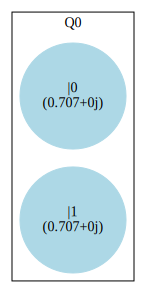

In [117]:
g1 = arks_representation(qubit_statevector.data)
g1.render('d2_q1_arks_repr', format="svg", view=True)
g1

### 3 Qubits ARKS Representation

In [113]:
circuit_qubit3 = QuantumCircuit(3)
circuit_qubit3.h(0)
circuit_qubit3.h(1)
circuit_qubit3.cnot(1, 2)
backend = Aer.get_backend("statevector_simulator")
qubit_statevector = backend.run(circuit_qubit3).result().get_statevector()
print(qubit_statevector.data)

[0.5+0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j 0.5+0.j]


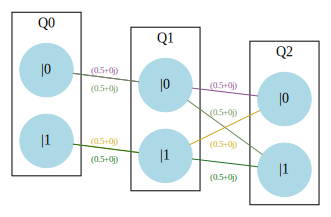

In [114]:
g2 = arks_representation(qubit_statevector.data)
g2.render('d2_arks_repr', format="svg", view=True)
g2

### 2 Qutrits ARKS Representation

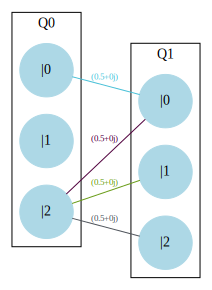

In [115]:
qutrit_statevector = [0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j]
g3 = arks_representation(qutrit_statevector, d=3)
g3.render('d3_arks_repr', format="svg", view=True)
g3